# Altruism and Lying Aversion – Power Analysis

This power analysis looks at the weakest test that we plan on using in our analysis, that being the Kolmogorov-Smirnov Test.  We use this test to evaluate the deviation in the density of choices from the expected uniform distribution, 1-5, of our modified dice-roll, lying-dictator game.

## Imports

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Kolmogorov-Smirnov 

In [2]:
def ks_power_analysis_custom_distributions(alpha=0.05, power=0.8, n_sim=1000):
    """
    Estimates the sample size needed to achieve a specified power for custom distributions in a K-S test.

    Parameters:
    - alpha: Significance level
    - power: Desired power of the test
    - n_sim: Number of simulations to perform

    Returns:
    - Estimated sample size needed
    """
    sample_sizes = np.arange(10, 501, 10)  # Sample sizes to explore

    # Distributions specifications
    null_distribution = np.array([1, 2, 3, 4, 5])  # Uniform distribution over 1, 2, 3, 4, 5
    alt_distribution_probs = np.array([1, 2, 3, 2, 1]) / 9  # Inverted V distribution probabilities

    for n in sample_sizes:
        n_rejections = 0
        for _ in range(n_sim):
            # Generate samples from the specified distributions
            null_sample = np.random.choice(null_distribution, size=n, replace=True)
            alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
            
            # Perform the K-S test
            _, p_value = stats.ks_2samp(null_sample, alt_sample)
            
            # Check if the null hypothesis is rejected
            if p_value < alpha:
                n_rejections += 1
        
        # Calculate the power for this sample size
        current_power = n_rejections / n_sim
        
        # If the power is at least the desired power, return the current sample size
        if current_power >= power:
            return n, current_power

    return None, None  # If no sample size was sufficient, return None

In [3]:
# Estimate the sample size needed for the custom distributions
estimated_sample_size_custom, achieved_power_custom = ks_power_analysis_custom_distributions()

estimated_sample_size_custom, achieved_power_custom

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_14279/130498406.py:27: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


(430, 0.801)

In [4]:
# Modify the function to record the power achieved at each sample size
def ks_power_analysis_custom_distributions_with_recording(alpha=0.05, power=0.8, n_sim=1000):
    sample_sizes = np.arange(10, 501, 10)  # Sample sizes to explore
    powers = []  # List to store the power achieved at each sample size

    # Distributions specifications
    null_distribution = np.array([1, 2, 3, 4, 5])
    alt_distribution_probs = np.array([1, 2, 3, 2, 1]) / 9

    for n in sample_sizes:
        n_rejections = 0
        for _ in range(n_sim):
            null_sample = np.random.choice(null_distribution, size=n, replace=True)
            alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
            _, p_value = stats.ks_2samp(null_sample, alt_sample)
            if p_value < alpha:
                n_rejections += 1
        current_power = n_rejections / n_sim
        powers.append(current_power)

    return sample_sizes, powers

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_14279/3030530732.py:15: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


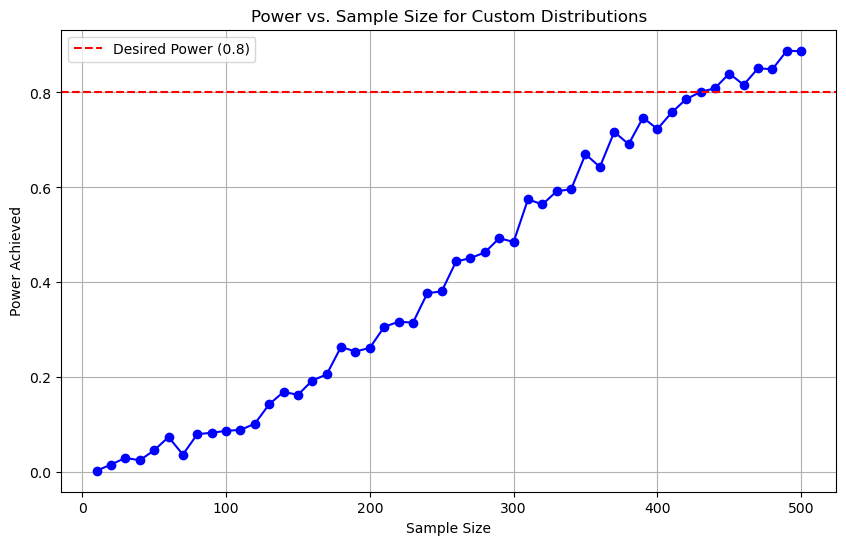

In [5]:
# Record the power achieved at each sample size
sample_sizes_recorded, powers_recorded = ks_power_analysis_custom_distributions_with_recording()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_recorded, powers_recorded, marker='o', linestyle='-', color='b')
plt.title('Power vs. Sample Size for Custom Distributions')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_14279/2864332737.py:20: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


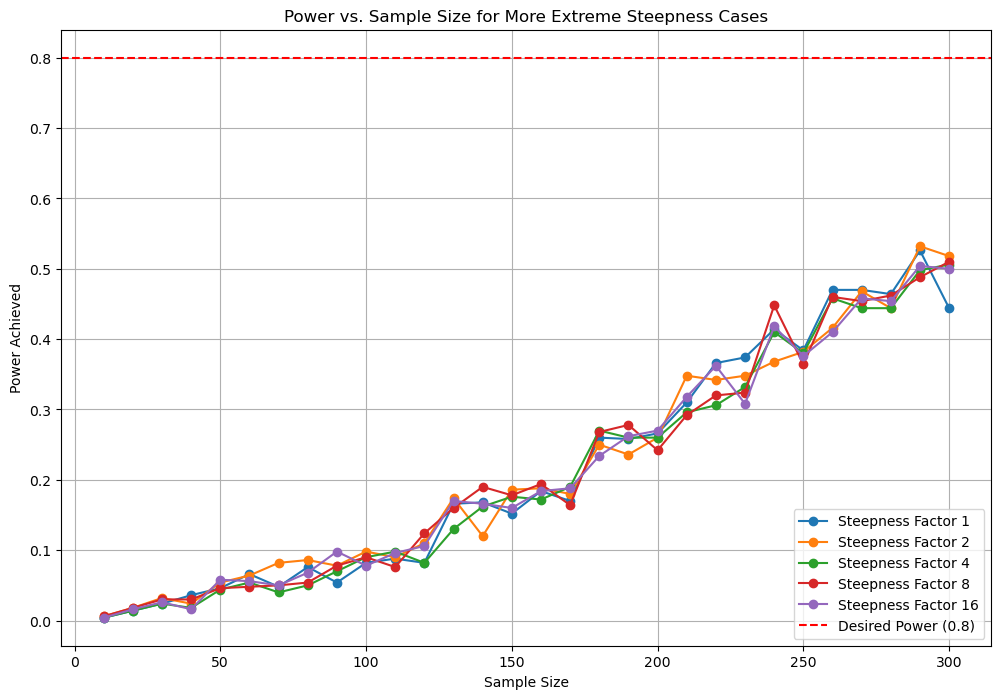

In [6]:
# Adjusting the analysis to include more extreme cases for the steepness and height of the inverted V distribution

def ks_power_analysis_extreme_cases(alpha=0.05, power=0.8, n_sim=500, steepness_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different steepness factors
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes

    null_distribution = np.array([1, 2, 3, 4, 5])

    for factor in steepness_factors:
        powers = []
        # Adjust the probabilities for the inverted V distribution based on the steepness factor
        alt_distribution_probs = np.array([1, 2, 3, 2, 1]) * factor
        alt_distribution_probs = alt_distribution_probs / alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                _, p_value = stats.ks_2samp(null_sample, alt_sample)
                if p_value < alpha:
                    n_rejections += 1
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis with more extreme steepness factors
results_extreme_cases = ks_power_analysis_extreme_cases()

# Plotting for the more extreme cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_cases:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Steepness Factor {factor}')

plt.title('Power vs. Sample Size for More Extreme Steepness Cases')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_14279/1125390145.py:21: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


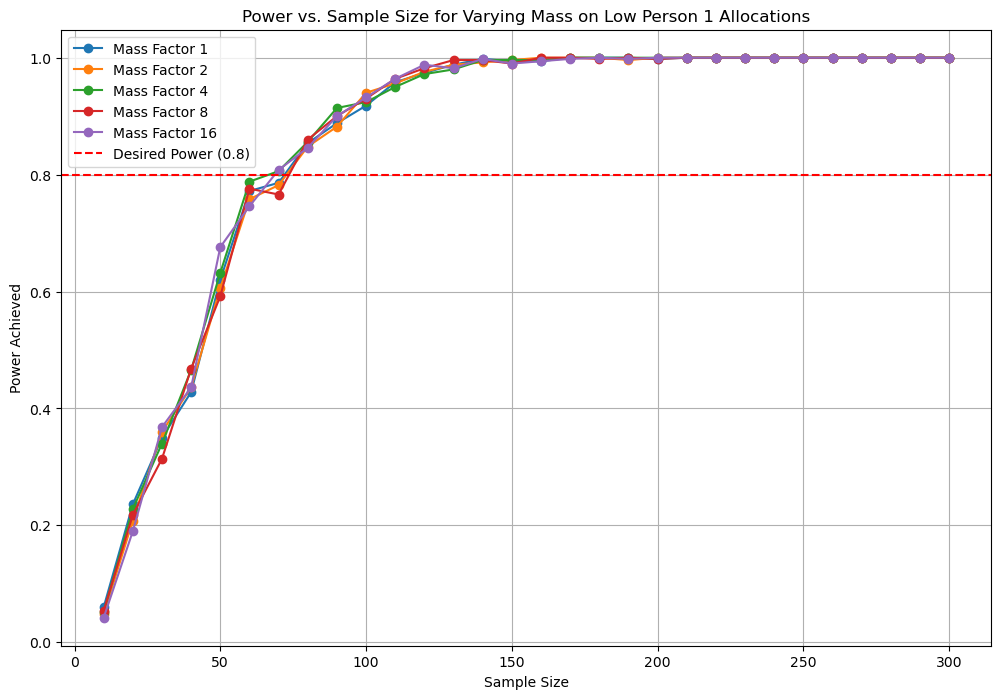

In [9]:
# Adjusting the analysis for an alternative hypothesis with a more extreme distribution of mass
# The alternative distribution will place a large amount of mass at 1, decreasing towards 5.

def ks_power_analysis_extreme_prior(alpha=0.05, power=0.8, n_sim=500, mass_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different mass distributions
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes

    null_distribution = np.array([1, 2, 3, 4, 5])

    for factor in mass_factors:
        powers = []
        # Create an extreme distribution for the alternative hypothesis
        alt_distribution_probs = np.array([4, 3, 2, 1, 0.5]) * factor
        alt_distribution_probs = alt_distribution_probs / alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                _, p_value = stats.ks_2samp(null_sample, alt_sample)
                if p_value < alpha:
                    n_rejections += 1
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis for the extreme prior alternative distributions
results_extreme_prior = ks_power_analysis_extreme_prior()

# Plotting for the more extreme prior cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_prior:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Varying Mass on Low Person 1 Allocations')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_14279/4237860839.py:21: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


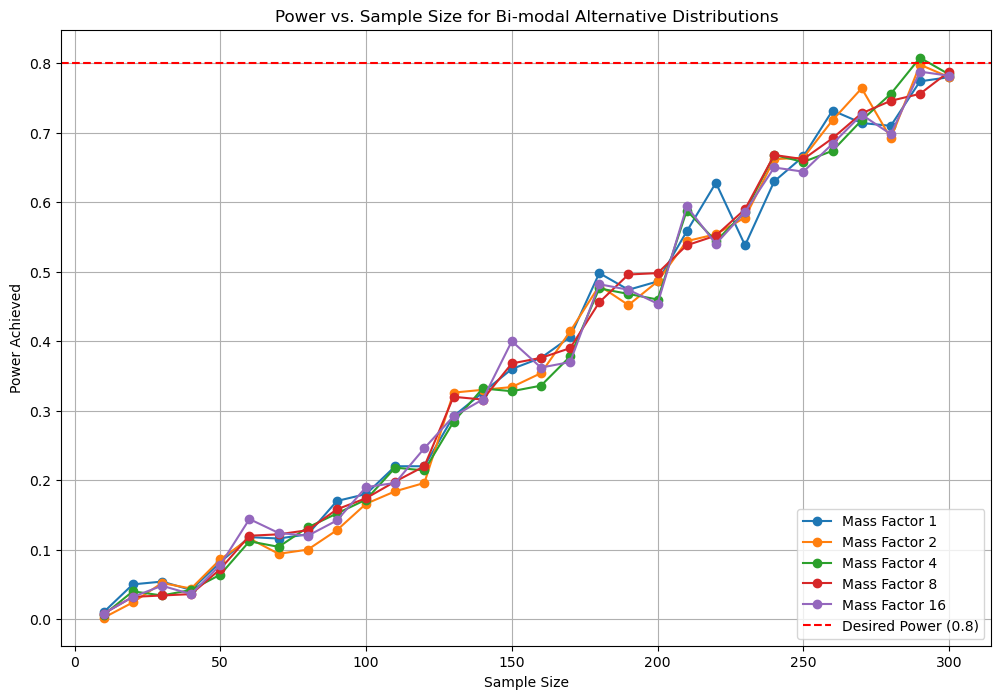

In [8]:
# Adjusting the analysis for a bi-modal alternative hypothesis
# This alternative distribution will place a large amount of mass at 1 and 5, less on 2 and 4, and the least on 3.

def ks_power_analysis_bimodal(alpha=0.05, power=0.8, n_sim=500, mass_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different bi-modal distributions
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes

    null_distribution = np.array([1, 2, 3, 4, 5])

    for factor in mass_factors:
        powers = []
        # Create a bi-modal distribution for the alternative hypothesis
        alt_distribution_probs = np.array([4, 2, 1, 2, 4]) * factor
        alt_distribution_probs = alt_distribution_probs / alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                _, p_value = stats.ks_2samp(null_sample, alt_sample)
                if p_value < alpha:
                    n_rejections += 1
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis for the bi-modal alternative distributions
results_bimodal = ks_power_analysis_bimodal()

# Plotting for the bi-modal cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_bimodal:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Bi-modal Alternative Distributions')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


## Chi-Squared

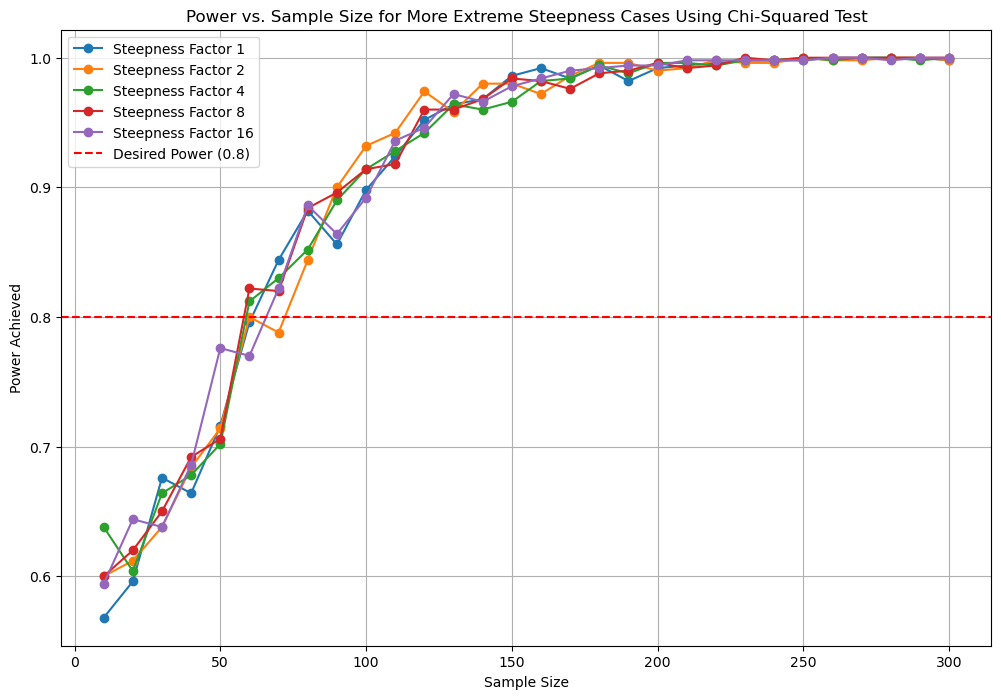

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def chi_squared_power_analysis_extreme_cases(alpha=0.05, power=0.8, n_sim=500, steepness_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different steepness factors
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes
    
    null_distribution = np.array([1, 2, 3, 4, 5])
    null_probs = np.ones_like(null_distribution) / len(null_distribution)  # Equal probabilities for null distribution

    for factor in steepness_factors:
        powers = []
        # Adjust the probabilities for the inverted V distribution based on the steepness factor
        alt_distribution_probs = np.array([1, 2, 3, 2, 1], dtype=float) * factor
        alt_distribution_probs /= alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True, p=null_probs)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                
                # Calculate observed frequencies for the null and alternative samples
                null_freqs = np.array([np.sum(null_sample == category) for category in null_distribution])
                alt_freqs = np.array([np.sum(alt_sample == category) for category in null_distribution])

                # Combine frequencies to get observed and expected frequencies
                observed = alt_freqs
                expected = null_freqs
                
                # Chi-squared test
                chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
                
                if p_value < alpha:
                    n_rejections += 1
            
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis with more extreme steepness factors
results_extreme_cases = chi_squared_power_analysis_extreme_cases()

# Plotting for the more extreme cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_cases:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Steepness Factor {factor}')

plt.title('Power vs. Sample Size for More Extreme Steepness Cases Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


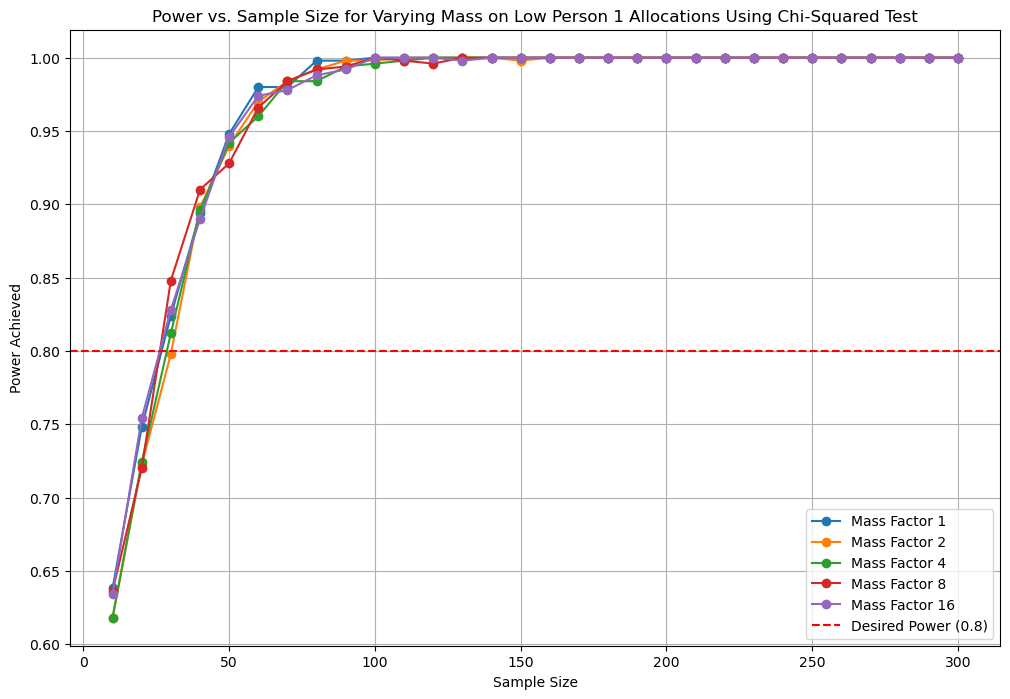

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def chi_squared_power_analysis_extreme_prior(alpha=0.05, power=0.8, n_sim=500, mass_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different mass distributions
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes
    
    null_distribution = np.array([1, 2, 3, 4, 5])
    null_probs = np.ones_like(null_distribution) / len(null_distribution)  # Equal probabilities for null distribution

    for factor in mass_factors:
        powers = []
        # Create an extreme distribution for the alternative hypothesis
        alt_distribution_probs = np.array([4, 3, 2, 1, 0.5]) * factor
        alt_distribution_probs /= alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True, p=null_probs)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                
                # Calculate observed frequencies for the null and alternative samples
                null_freqs = np.array([np.sum(null_sample == category) for category in null_distribution])
                alt_freqs = np.array([np.sum(alt_sample == category) for category in null_distribution])

                # Combine frequencies to get observed and expected frequencies
                observed = alt_freqs
                expected = null_freqs
                
                # Chi-squared test
                chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
                
                if p_value < alpha:
                    n_rejections += 1
            
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis for the extreme prior alternative distributions
results_extreme_prior = chi_squared_power_analysis_extreme_prior()

# Plotting for the more extreme prior cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_prior:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Varying Mass on Low Person 1 Allocations Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


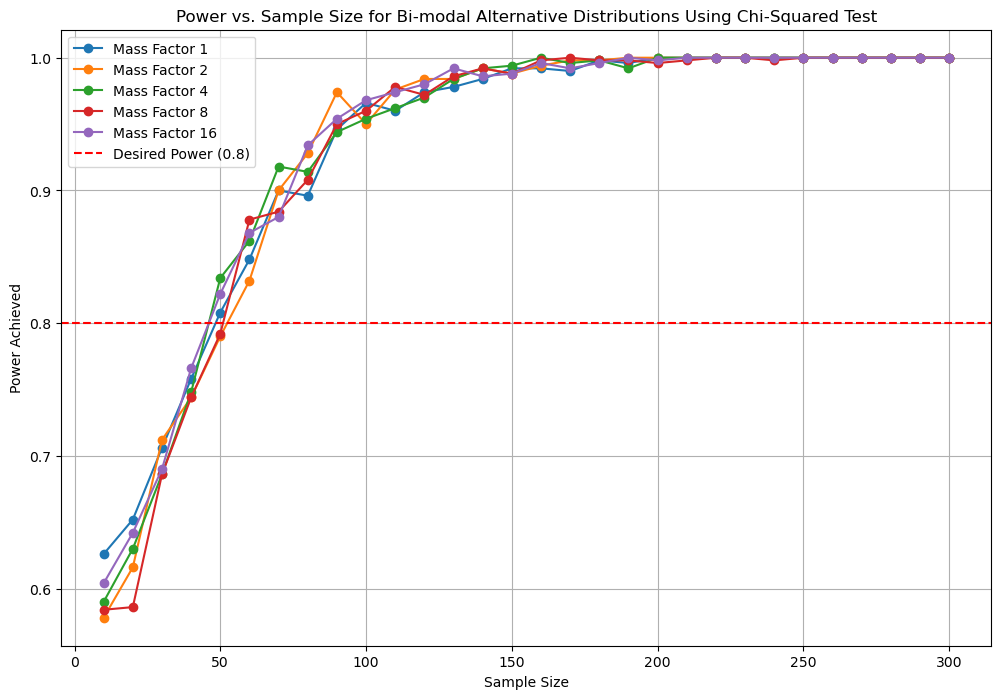

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def chi_squared_power_analysis_bimodal(alpha=0.05, power=0.8, n_sim=500, mass_factors=[1, 2, 4, 8, 16]):
    results = []  # List to store results for different bi-modal distributions
    sample_sizes = np.arange(10, 301, 10)  # Range of sample sizes
    
    null_distribution = np.array([1, 2, 3, 4, 5])
    null_probs = np.ones_like(null_distribution) / len(null_distribution)  # Equal probabilities for null distribution

    for factor in mass_factors:
        powers = []
        # Create a bi-modal distribution for the alternative hypothesis
        alt_distribution_probs = np.array([4, 2, 1, 2, 4], dtype=float) * factor
        alt_distribution_probs /= alt_distribution_probs.sum()

        for n in sample_sizes:
            n_rejections = 0
            for _ in range(n_sim):
                null_sample = np.random.choice(null_distribution, size=n, replace=True, p=null_probs)
                alt_sample = np.random.choice(null_distribution, size=n, replace=True, p=alt_distribution_probs)
                
                # Calculate observed frequencies for the null and alternative samples
                null_freqs = np.array([np.sum(null_sample == category) for category in null_distribution])
                alt_freqs = np.array([np.sum(alt_sample == category) for category in null_distribution])

                # Combine frequencies to get observed and expected frequencies
                observed = alt_freqs
                expected = null_freqs
                
                # Chi-squared test
                chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
                
                if p_value < alpha:
                    n_rejections += 1
            
            current_power = n_rejections / n_sim
            powers.append(current_power)
        
        results.append((factor, sample_sizes, powers))
    
    return results

# Perform the analysis for the bi-modal alternative distributions
results_bimodal = chi_squared_power_analysis_bimodal()

# Plotting for the bi-modal cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_bimodal:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Bi-modal Alternative Distributions Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()
